# Exercises

## 1. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

C:\Users\Finn\anaconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X = mnist.data
y = mnist.target

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

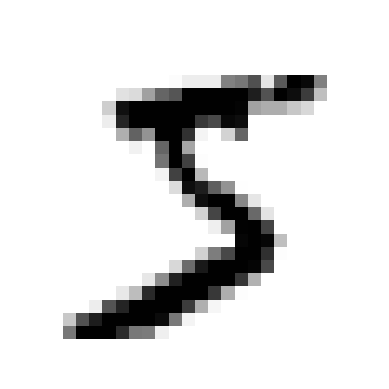

Label: 5


In [13]:
# Testing the function

plot_digit(X[0])
plt.show()
print(f"Label: {y[0]}")

## Exploring the data

In [18]:
# Copy dataset to expiriment
X_ = X.copy()
y_ = y.copy()

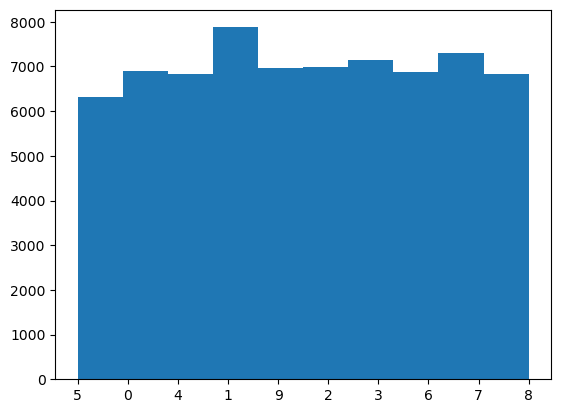

In [21]:

plt.hist(y)
plt.show()

Seems to be pretty well distributed, but 1 and 